# <a id="2">Load packages</a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from keras.utils import plot_model

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

2024-03-13 07:57:27.169779: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 07:57:27.835696: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 07:57:27.844702: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 07:57:27.932252: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-13 07:57:28.326108: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 07:57:28.390023: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
print("Tensorflow Version used :", tf.__version__)

Tensorflow Version used : 2.15.0


## Parameters

In [3]:
# Dataset params
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2024

#Model params
NUMB_EPOCHS = 50
BATCH_SIZE = 128

* Each row is a separate image
* Column 1 is the class label(the article of clothing).
* Remaining columns are pixel numbers (784 total).
* Each value is the darkness of the pixel (1 to 255)


In [4]:
train_kaggle = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_train.csv")
test_kaggle = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_test.csv")

In [5]:
train_kaggle.shape

(60000, 785)

In [6]:
type(train_kaggle)

pandas.core.frame.DataFrame

### From Keras 

Keras provides some utility functions to fetch and load common datasets, including Fashion MNIST. One important difference is that every image is represented as a 28×28 array rather than a 1D array of size 784.


In [7]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
type(X_train_full)

numpy.ndarray

It's a numpy array rather than a Pandas DataFrame.

# <a id="4">Data exploration</a>

In [10]:
train_kaggle.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
print("Fashion MNIST train shape -->", train_kaggle.shape)
print("Fashion MNIST test shape  -->", train_kaggle.shape)

Fashion MNIST train shape --> (60000, 785)
Fashion MNIST test shape  --> (60000, 785)


## <a id="41">Classes distribution</a>

Let's see how many number of images are in each class for the train set and test set

In [12]:
train_kaggle["label"].value_counts()

label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64

In [13]:
test_kaggle["label"].value_counts()

label
0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: count, dtype: int64

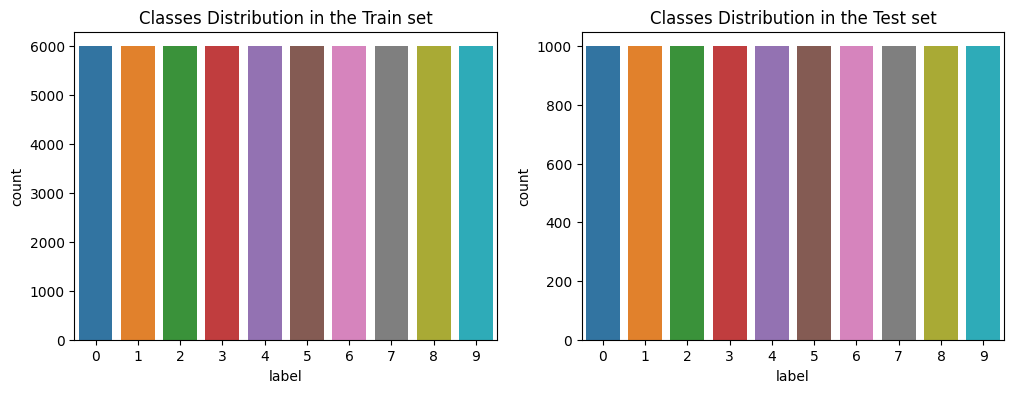

In [14]:
f, ax = plt.subplots(1,2, figsize=(12,4))
g1 = sns.countplot(data=train_kaggle, x='label', ax=ax[0])
g2 = sns.countplot(data=test_kaggle, x='label', ax=ax[1])

g1.set_title("Classes Distribution in the Train set")
g2.set_title("Classes Distribution in the Test set")
plt.show()  

In the train and the test set the 10 classes are equaly distributed (10% each).  

## <a id="42">Sample images</a>

### Train set images

Let's plot some samples for the images.   
We add labels to the train set images, with the corresponding fashion item category.  

In [15]:
# dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

In [16]:
def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(4)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(28, 28)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_kaggle)

Total number of sample images to plot:  40


Let's now plot the images.   
The labels are shown above each image.

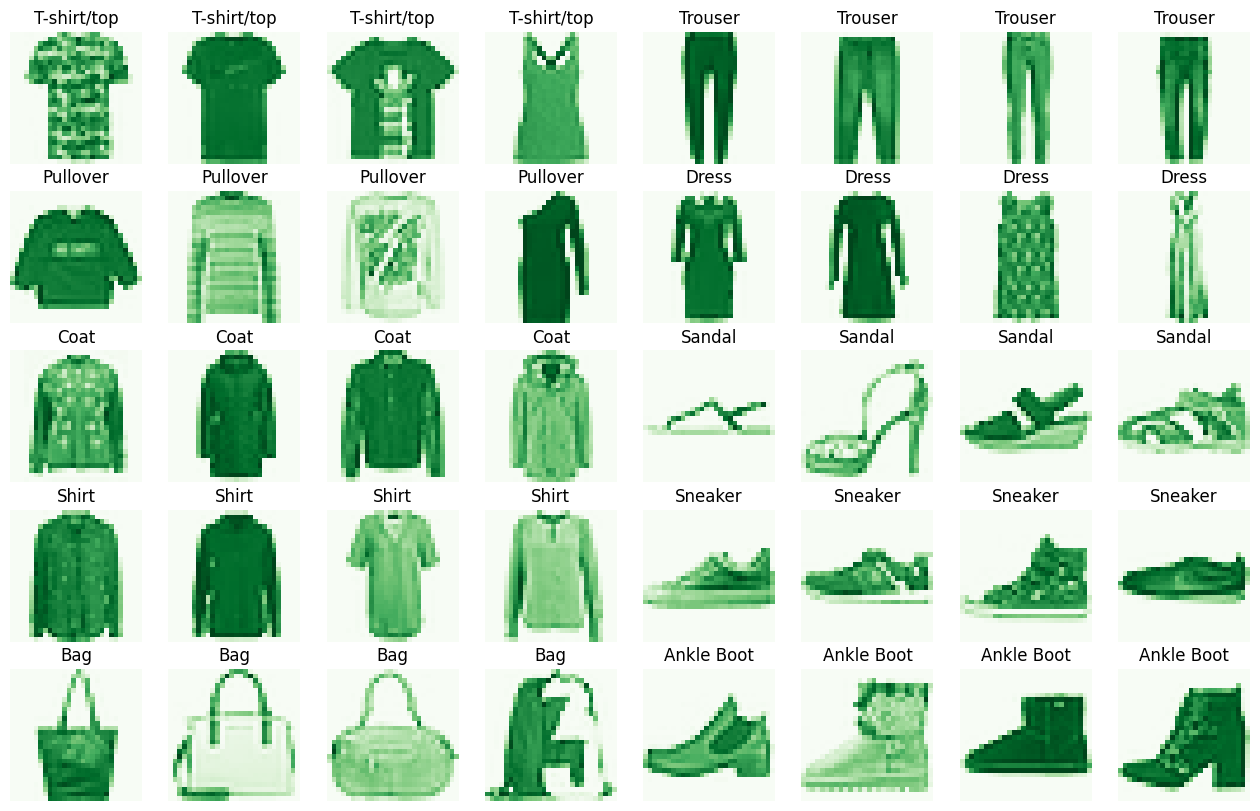

In [17]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()    
    
plot_sample_images(train_sample_images,train_sample_labels, "Greens")

### Test set images

Let's plot now a selection of the test set images.  
Labels are as well added (they are known).  

Total number of sample images to plot:  40


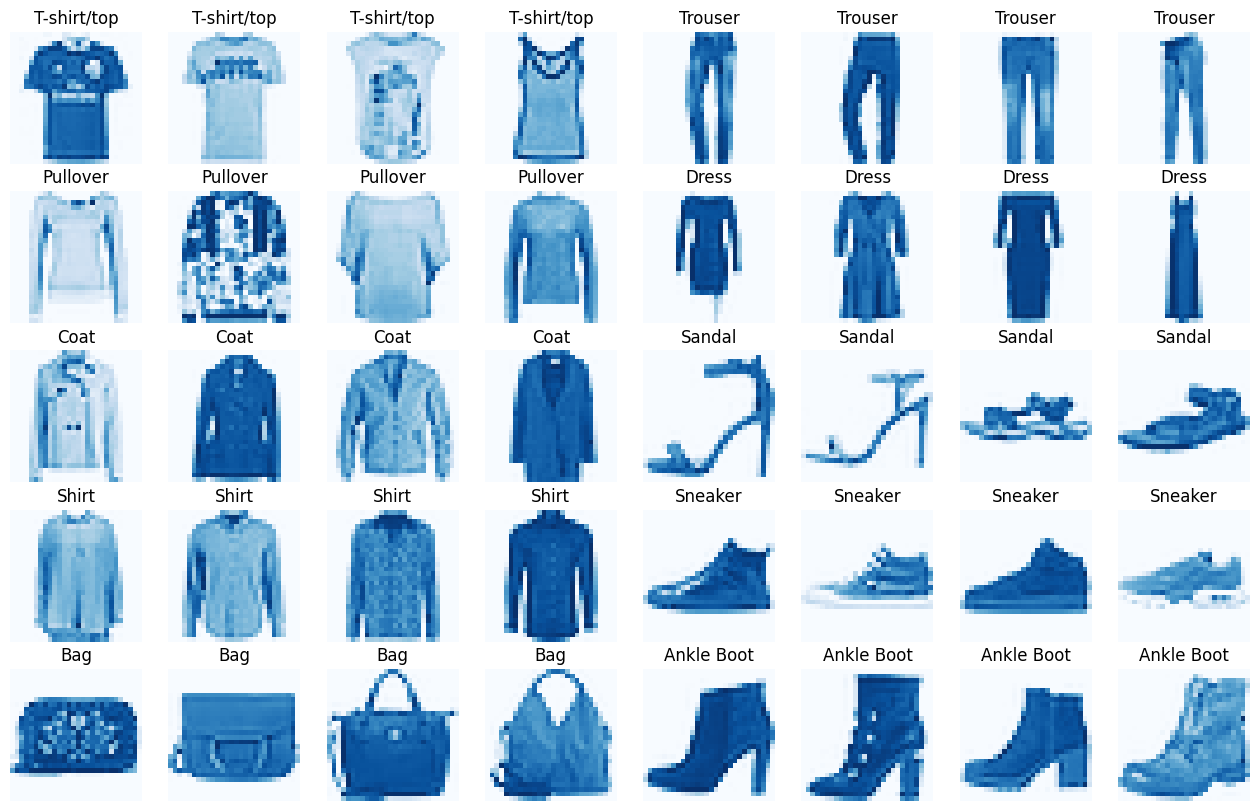

In [18]:
test_sample_images, test_sample_labels = sample_images_data(test_kaggle)
plot_sample_images(test_sample_images,test_sample_labels)

# <a id="5">Model</a>

We start with preparing the model.

## <a id="51">Prepare the model</a>

### Data preprocessing

First we will do a data preprocessing to prepare for the model.

Since the second dataset is already a numpy matrix (28,28,1) and has been splitted to train aand test, we'll use it. We must create a validation set and scale the input features so since we are going to train the neural network using Gradient Descent.   
For simplicity, we'll just scale the pixel intensities down to the 0-1 range by dividing them by 255.0.

In [19]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## <a id="52">Creating the Model Using the Sequential API
</a>

### Build the model   

Now let’s build the neural network! Here is a classification MLP with two hidden layers:

* **Sequential model:** This is the simplest kind of Keras model, for neural networks that are just composed of a single stack of layers, connected sequentially. It can be first initialized and then we add layers using **add** method or we can add all layers at **init stage**.

* **Flatten** role is simply to convert each input image into a 1D array: if it receives input data X, it computes X.reshape(-1, 1). This layer does not have any parameters, it is just there to do some simple preprocessing. Since it is the first layer in the model, you should specify the input_shape.
 
* **Dense:** Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). 
 
* **Dense**. This layer is a regular fully-connected NN layer. It is used without parameters;
 * units - this is a positive integer, with the meaning: dimensionality of the output space; in this case is: 100;
 * activation - activation function : `relu`;
 
* **Dense**. This is the final layer (fully connected). It is used with the parameters:
 * units: the number of classes (one per class; in our case 10);
 * activation : `softmax`; for this final layer it is used `softmax` activation (standard for multiclass classification - because the classes are exclusive)
 


In [20]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### Inspect the model

The model’s summary() method displays all the model’s layers, including each layer’s name (which is automatically generated unless you set it when creating the layer), its
output shape (None means the batch size can be anything), and its number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters. 

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Let's also plot the model

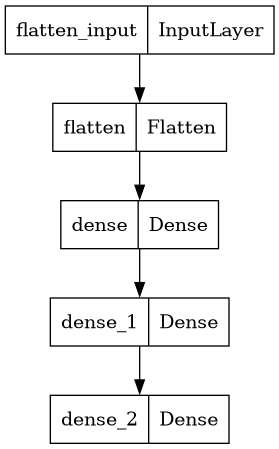

In [22]:
plot_model(model, to_file='model.png')

We can easily get a model’s list of layers, to fetch a layer by its index, or you can fetch it by name

In [23]:
model.layers

### Compiling the Model


After a model is created, you must call its compile() method to specify the loss function and the optimizer to use.   Optionally, you can also specify a list of extra metrics to
compute during training and evaluation:

* **loss**: we use the "sparse_categorical_crossen
tropy" loss because we have sparse labels (i.e., for each instance there is just a target class index, from 0 to 9 in this case), and the classes are exclusive.

* **optimizer**: "sgd" simply means that we will train the model using simple Stochastic Gradient Descent. In other words, Keras will perform the backpropagation algorithm

* **metrics**: since this is a classifier, it’s useful to measure its "accuracy" during training and evaluation

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

### Training and Evaluating the Model

Now the model is ready to be trained. For this we simply need to call its fit() method on the training set. We are also using the validation set (a subset from the orginal training set) for validation.

In [25]:
history = model.fit(X_train, y_train,
                  epochs=30,
                  validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7052 - accuracy: 0.7669 - val_loss: 0.5089 - val_accuracy: 0.8276
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4875 - accuracy: 0.8295 - val_loss: 0.4536 - val_accuracy: 0.8446
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4429 - accuracy: 0.8446 - val_loss: 0.4251 - val_accuracy: 0.8556
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4158 - accuracy: 0.8551 - val_loss: 0.4013 - val_accuracy: 0.8638
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3961 - accuracy: 0.8610 - val_loss: 0.3751 - val_accuracy: 0.8750
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3797 - accuracy: 0.8656 - val_loss: 0.3713 - val_accuracy: 0.8724
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3661 - accuracy: 0.8703 - val_loss: 0.3538 - val_accuracy:

## <a id="53">Test prediction accuracy</a>

We calculate the test loss and accuracy.

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 64.5688 - accuracy: 0.8447


[64.56879425048828, 0.8446999788284302]

Test accuracy is  around  0.84.

We evaluated the model accuracy based on the predicted values for the test set.  Let's check the validation value during training.



## <a id="54">Validation accuracy and loss</a>

Let's plot the train and validation accuracy and loss, from the train history.

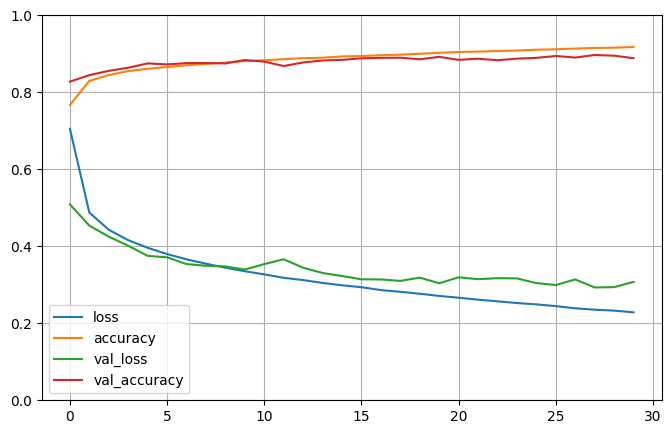

In [27]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Both the training and validation accuracy steadily increase during training, while the training and validation loss decrease. Good! Moreover, the validation curves are quite close to the training curves, which means that there is not too much overfitting.